In [ ]:
#Description: Use the relative Strength Index (RSI) and Python to dtermine if a stock is being over bought or oversold 

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use ('fivethirtyeight')

In [ ]:
#Load the data 
from google.colab import files
uploaded = files.upload()

Saving AMAZON.csv to AMAZON.csv


In [ ]:
#Store the data 
AMAZON = pd.read_csv('AMAZON.csv')
#show the data 
AMAZON

,Date,High,Low,Open,Close,Volume,Adj Close
0,2020-02-03,2048.500000,2000.250000,2010.599976,2004.199951,5899100,2004.199951
1,2020-02-04,2059.800049,2015.369995,2029.880005,2049.669922,5289300,2049.669922
2,2020-02-05,2071.020020,2032.000000,2071.020020,2039.869995,4376200,2039.869995
3,2020-02-06,2056.300049,2024.800049,2041.020020,2050.229980,3183000,2050.229980
4,2020-02-07,2098.530029,2038.099976,2041.989990,2079.280029,5095300,2079.280029
...,...,...,...,...,...,...,...
163,2020-09-24,3069.300049,2965.000000,2977.790039,3019.790039,5529400,3019.790039
164,2020-09-25,3101.540039,2999.000000,3054.860107,3095.129883,4615200,3095.129883
165,2020-09-28,3175.040039,3117.169922,3148.850098,3174.050049,4224200,3174.050049
166,2020-09-29,3188.260010,3132.540039,3175.389893,3144.879883,3495800,3144.879883


In [ ]:
#Set the date as the index for the data 
AMAZON = AMAZON.set_index(pd.DatetimeIndex(AMAZON['Date'].values))
AMAZON

,Date,High,Low,Open,Close,Volume,Adj Close
2020-02-03,2020-02-03,2048.500000,2000.250000,2010.599976,2004.199951,5899100,2004.199951
2020-02-04,2020-02-04,2059.800049,2015.369995,2029.880005,2049.669922,5289300,2049.669922
2020-02-05,2020-02-05,2071.020020,2032.000000,2071.020020,2039.869995,4376200,2039.869995
2020-02-06,2020-02-06,2056.300049,2024.800049,2041.020020,2050.229980,3183000,2050.229980
2020-02-07,2020-02-07,2098.530029,2038.099976,2041.989990,2079.280029,5095300,2079.280029
...,...,...,...,...,...,...,...
2020-09-24,2020-09-24,3069.300049,2965.000000,2977.790039,3019.790039,5529400,3019.790039
2020-09-25,2020-09-25,3101.540039,2999.000000,3054.860107,3095.129883,4615200,3095.129883
2020-09-28,2020-09-28,3175.040039,3117.169922,3148.850098,3174.050049,4224200,3174.050049
2020-09-29,2020-09-29,3188.260010,3132.540039,3175.389893,3144.879883,3495800,3144.879883


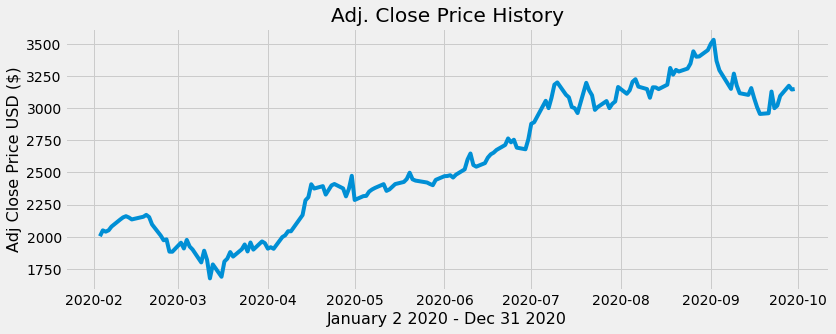

In [ ]:
#Visually show the price
plt.figure(figsize=(12.2, 4.5))
plt.plot(AMAZON.index,AMAZON['Adj Close'], label = 'Adj Close')
plt.title('Adj. Close Price History')
plt.xlabel ('January 2 2020 - Dec 31 2020', fontsize = 16)
plt.ylabel('Adj Close Price USD ($)', fontsize = 16)
plt.show()

In [ ]:
#Prepare the datqa to calculate the RSI 

#Get the difference in price from the previous day 

In [ ]:
delta = AMAZON ['Adj Close'].diff(1)
delta

2020-02-03          NaN
2020-02-04    45.469971
2020-02-05    -9.799927
2020-02-06    10.359985
2020-02-07    29.050049
                ...    
2020-09-24    19.929932
2020-09-25    75.339844
2020-09-28    78.920166
2020-09-29   -29.170166
2020-09-30     3.850098
Name: Adj Close, Length: 168, dtype: float64

In [ ]:
#Get rid of NnaN
delta = delta.dropna()
delta

2020-02-04    45.469971
2020-02-05    -9.799927
2020-02-06    10.359985
2020-02-07    29.050049
2020-02-10    54.629883
                ...    
2020-09-24    19.929932
2020-09-25    75.339844
2020-09-28    78.920166
2020-09-29   -29.170166
2020-09-30     3.850098
Name: Adj Close, Length: 167, dtype: float64

In [ ]:
#Get the positive gains (up) and the negative gains (Down)
up = delta.copy()
down = delta.copy()

up[up<0]=0
down[down > 0] = 0

In [ ]:
#Get the time period 
period = 14
#Calculate the average gain and the average loss 
AVG_Gain = up.rolling(window=period).mean()
AVG_Loss = abs(down.rolling(window=period).mean())

In [ ]:
#Calculate the RSI 

#Caluclate the Relative Strength 
RS = AVG_Gain / AVG_loss 

#Calculate the Relative Strength Index 
RSI = 100.0 - (100.0 / (1.0 + RS ))

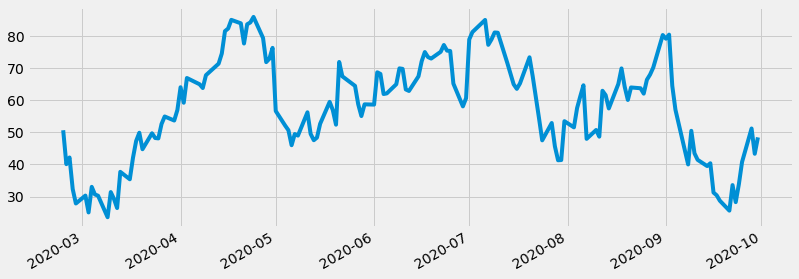

In [ ]:
#Show the RSI visually 
plt.figure(figsize=(12.2, 4.5))
RSI.plot()
plt.show()

In [ ]:
#Put it all together 

#Create a new data frame 
new_df = pd.DataFrame()
new_df['Adj Close Price'] = AMAZON['Adj Close']
new_df['RSI'] = RSI
new_df

,Adj Close Price,RSI
2020-02-03,2004.199951,NaN
2020-02-04,2049.669922,NaN
2020-02-05,2039.869995,NaN
2020-02-06,2050.229980,NaN
2020-02-07,2079.280029,NaN
...,...,...
2020-09-24,3019.790039,33.880509
2020-09-25,3095.129883,40.781837
2020-09-28,3174.050049,51.191212
2020-09-29,3144.879883,43.323357


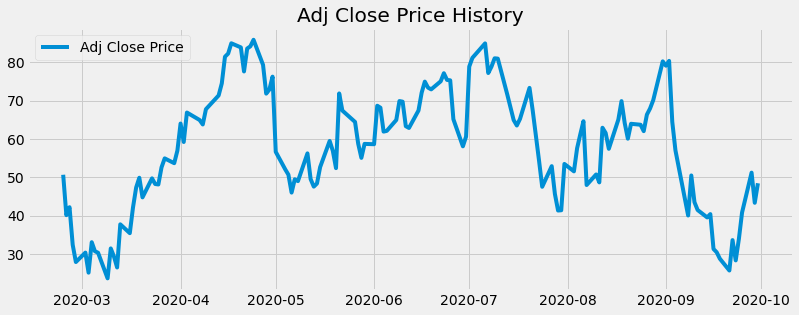

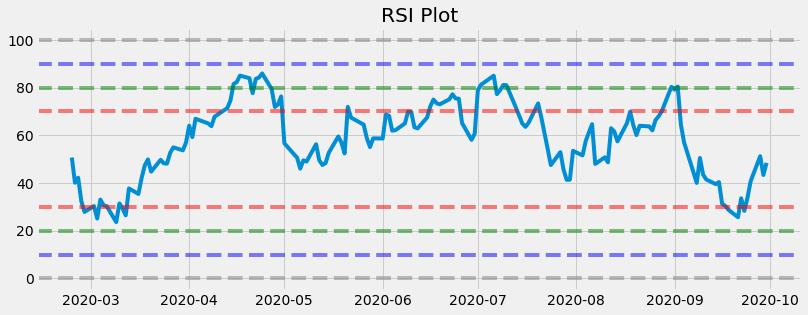

In [ ]:
#Visually show the adjusted close price and RSI 

#Plot the adjusted close price
plt.figure(figsize=(12.2, 4.5))
plt.plot(new_df.index, new_df['RSI'])
plt.title ('Adj Close Price History')
plt.legend(new_df.columns.values, loc = 'upper left')
plt.show()

#Plot the corresponding RSI valaues and the siginificant levels 
plt.figure(figsize=(12.2, 4.5))
plt.title('RSI Plot')
plt.plot(new_df.index, new_df['RSI'])
plt.axhline(0, linestyle= '--', alpha = 0.5, color='gray')
plt.axhline(10, linestyle= '--', alpha = 0.5, color='blue')
plt.axhline(20, linestyle= '--', alpha = 0.5, color='green')
plt.axhline(30, linestyle= '--', alpha = 0.5, color='red')
plt.axhline(70, linestyle= '--', alpha = 0.5, color='red')
plt.axhline(80, linestyle= '--', alpha = 0.5, color='green')
plt.axhline(90, linestyle= '--', alpha = 0.5, color='blue')
plt.axhline(100, linestyle= '--', alpha = 0.5, color='gray')
plt.show()

In [ ]:

#In March 2020 the RSI value dips below the 20 significant level indicator. This tells us the stock was oversold and presents a buying opportunity for the investor. If you look up at the Adj Close Price History it shows it would have been a good time to buy the stock because afterwards we can see the price shoots up! If you followed the indicator you would have bought the stock at around 